# Data Visualization in Python (Maybe in R)
### DS 6001: Practice and Application of Data Science
### Jon Kropko and Brian Wright

Data Communications is a critical piece of the Data Science Pipeline. If you cannot articulate your ideas or output in a way that resonates with your audience it is possible, that much of your hard work will not have a impact. 

The intent here is to give you a quick overview of several plotting options in Python that could help you in building your final presentations.  Also, I feel compelled to mention that it's very likely that the best graphical package currently available is **ggplot2 in R**. There's a Python version of ggplot but it does not have the full capability of the current version in R. We will work through this package on a limited basis once we get to DASH but if you have questions on ggplot2 just let us know and we can help. 

DASH is a platform for building web apps that works with either R or Python though it was designed first to be used with plot.ly in Python which is more or less built on matplot.lib.  As a result, we are going to slowing build from matplot.lib (which is not great to be honest), to SEABORN (better), to Plot.ly (much better) and finally to DASH (pretty solid).  

Each one of these packages builds on each other and at the end you should have a good feel for developing graphics in the Python environment at varying levels of complexity.  


### **Table of Contents:**

[Data Communication throughout the Process](#overview)

* [Tufte Principles of Graphical Integrity](#Tufte)

[Data Exploration_Matplotlib](#basics)

[Data_Vis_Seaborn](#basics+)

[Interactivity with Plotly](#more)

[DASH_Web__Apps](#DASH)


### Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as col
from scipy import stats

#import plotly.graph_objects as go

# <a name="overview"></a> Data Vis_Comms Inside the Pipeline

Data plotting and communication means different things at different stages of the data lifecycle. 

![](https://i.pinimg.com/originals/37/a6/85/37a6852abbfe861787bfb0f00c8df513.jpg)

* What examples can you think of? 

This likely means that type of data visualizations that you choose at any stage along the way should vary in complexity, style and purpose. There are times when ugly graphes are totally fine, means to end...enter Matplotlib. 

# Edward Tufte <a name="Tufte"></a>  (The Visual Display of Quantitative Information (2nd ed.))

## Graphical Integrity 

1. The representation of numbers, as physically measured on the surface of the graphic itself, should be directly proportional to the numerical quantities measured.

    * What does this mean? 
    
  “The Lie Factor” is defined as:

lie factor = size of effect shown in graphic/
                size of effect in data

![](https://thedoublethink.com/wp-content/uploads/2016/09/lie_factor_example1_image.jpg)

% change in the data = 53% (27.5-18)/18 * 100 

% change in the graph = 783% (5.3-.6)/.6 * 100

lie factor = 783/53 = 14.7

Example: limiting the y axis 

    
2. Clear, detailed, and thorough labeling should be used to defeat graphical distortion and ambiguity. Write out explanations of the data on the graphic itself. Label important events in the data.

![](https://www.edwardtufte.com/bboard/images/0003r6-11802.jpg)


3. Show data variation, not design variation. The below is pretty funny but it's really just a design graphic not a data graphic. 

![](https://i.imgur.com/PHmF5.jpg)


4. In time-series displays of money, deflated and standardized units of monetary measurement are nearly always better than nominal units.



5. The number of information-carrying dimensions depicted should not exceed the number of dimensions in the data, no reason to have this be in 3d.

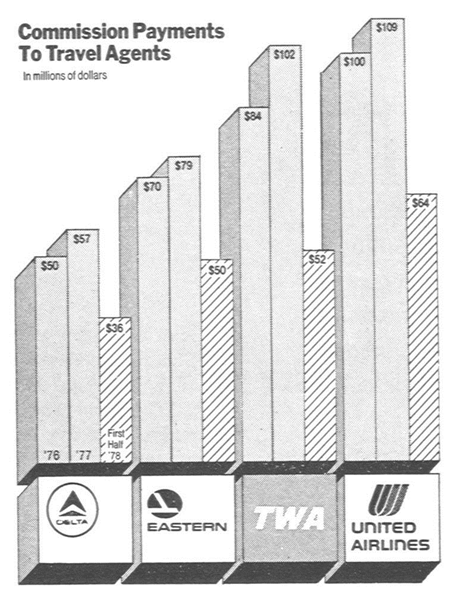

6. Graphics must not quote data out of context.


## Data Ink 

 * Above all else show the data.

 * Maximize the data-ink ratio.
 
### Bad
 ![](http://jcsites.juniata.edu/faculty/rhodes/ida/images/votereg.gif)
    
 
### Good
 ![](http://jcsites.juniata.edu/faculty/rhodes/ida/images/votereg2.gif)
 
 * Erase non-data-ink.

 * Erase redundant data-ink.

 * Revise and edit.
    

## Chartjunk 
 
 * Essentially the excessive and unnecessary use of graphical effects in graphs.
 
  ![](http://jcsites.juniata.edu/faculty/rhodes/ida/images/minesrpt.jpg)
 
 
### Classic Example "Best Statistical Graphic Ever Drawn"

  ![](https://upload.wikimedia.org/wikipedia/commons/2/29/Minard.png)

Details Napoleon's army departing the Polish-Russian border after Russian Campaign of 1812.

Manages to depict 6 different sets of data: latitude, longitude, direction of movement, time, temperature, and size of the army.

## **Show Differences, Comparisons and Contrast: What is the message you are providing to your audience with this graphic**

# <a name="basics"></a> Matplotlib_Basics

## [Help Documentation](https://matplotlib.org/3.1.1/api/pyplot_summary.html)




#line --------------------------------------------------


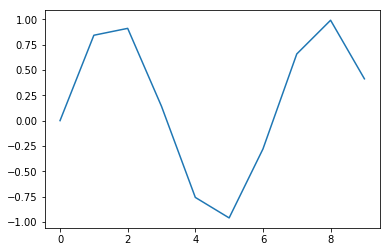

In [3]:
x1 = np.arange(10)
y1 = np.sin(x1)
plt.plot(x1, y1) 
#plt.show() #places it in the order of your you want or allows for several graphes to be generated from one chunk

print('#line',50*"-")

#stacked bar --------------------------------------------------


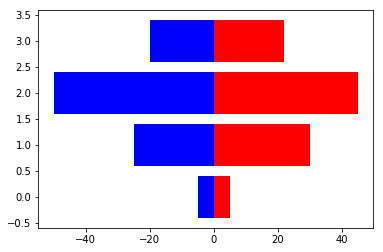

In [4]:
BMI = np.array([5., 30., 45., 22.])
age = np.array( [5., 25., 50., 20.])
x11 = np.arange(4) # Just creates a single line array (vector)
plt.barh(x11, BMI, color = 'r') #Bar not a histogram so first entry is the y coordinates and the next is the width
plt.barh(x11, -age, color = 'b') # -sign here indicates that the data should be pushed to the other side of the graph
#plt.show()

#flip the bars and change the colors 

print('#stacked bar',50*"-")

### There's a Five Step Process for Producing Graphes 

    1. Prepare the Data - Includes list for labels. 
    2. Create a the Plot, the space for the data more or less
    3. Plot the plot, put the data on the space 
    4. Customize the Plot, show you are more than just a line graph
    5. Save 
    6. Brag...show it off...show
    
**Let's look at a example from the [Python_Matplotlib_Cheat_Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)**   

#Cheat_Example --------------------------------------------------


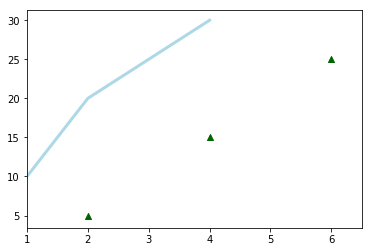

In [5]:
#Take a closer look by commenting through each of these steps: 

x = [1,2,3,4] #1a
y = [10,20,25,30] #1b

fig = plt.figure() #2a
ax = fig.add_subplot(111) #2b Always going to be 1 though 1 on the axis, 111 is the size of the plot, bigger=smaller, 
#don't have to indicate anything the default is 111.
ax.plot(x, y, color='lightblue', linewidth=3) #3a Boom added some data
ax.scatter([2,4,6],[5,15,25], #3b Adding more data not passing in data building a internal lists
 color='darkgreen',
 marker='^')
#What changed, why, beside the obvious? 
ax = ax.set_xlim(1, 6.5) #4 Now we are going make improvements

#plt.savefig('foo.png') #5
#plt.show() #6
print('#Cheat_Example',50*"-")

### PIE

#pie --------------------------------------------------


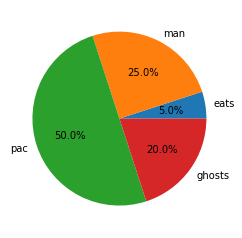

In [6]:
data = np.array([5, 25, 50, 20]) # defining the features of the PIE 

labels = "eats","man","pac","ghosts"
explode = (0.0, 0.0, 0.0, 0.0)  

anything, yum = plt.subplots() #combing 2a and 2b from above


yum.pie(data, labels=labels,  autopct='%1.1f%%', explode=explode, labeldistance=1.1)#need autopct to get the labels to show up 


# What's wrong with this graph...how do I fix?

#plt.show()

#Make this look like pacman is eating "ghosts"
#Make the words read in order on the graph

#Could add a legend

print('#pie',50*"-")

In [7]:
#yum.legend(title="Unknown", loc="lower left")

### Histogram 

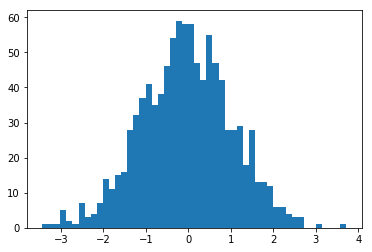

#histogram --------------------------------------------------


In [8]:
x12 = np.random.randn(1000) #1
plt.hist(x12, bins = 50) #2-4
#plt.save()
plt.show() #6

#Change the bins and the color of the bars 
print('#histogram',50*"-")

### Boxplots

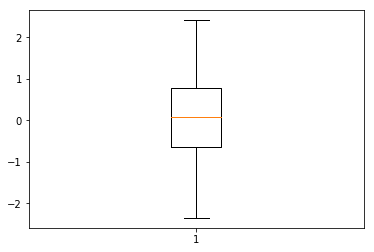

#single_boxplot --------------------------------------------------


In [9]:
data = np.random.randn(100) 
plt.boxplot(data)
plt.show()
print('#single_boxplot',50*"-")
#plt.savefig('boxplot.png')

#parts of a boxplot?

#data_1 = np.random.randn(100, 5)
#plt.boxplot(data_1)
#plt.show() #important to use the plt.show() function here otherwise the output gets rendered on the same graph 

#print('#multiple_boxplot',50*"-")

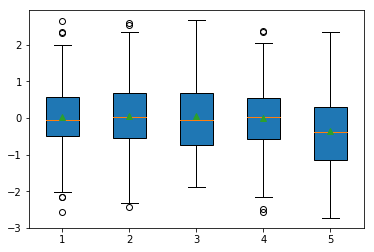

In [10]:
data_1 = np.random.randn(100, 5) #100 data points in five columns 


plt.boxplot(data_1, 
            patch_artist=True, showmeans=True)# fills in the boxes       
        
plt.show()

#Add the means to each of the boxes

### Several Plots Side by Side

Start with the landscape and generating the data, basically subplots. 

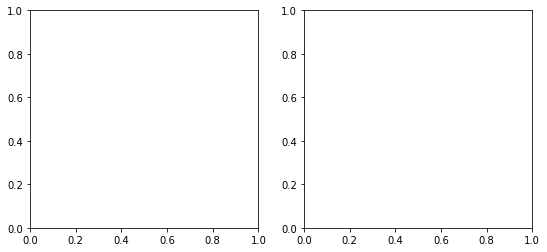

In [28]:
np.random.seed(19680801)
all_data = [np.random.normal(1, std, size=100) for std in range(1, 4)] #(center, scale, size)
labels = ['Yes', 'No', 'Maybe'] 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4)) #The ncols here directs how many graphes we are generating, will also
# be used as we move forward with applying data

Then We Can Add the Boxplots 

Text(0.5, 1.0, 'Rectangular box plot')

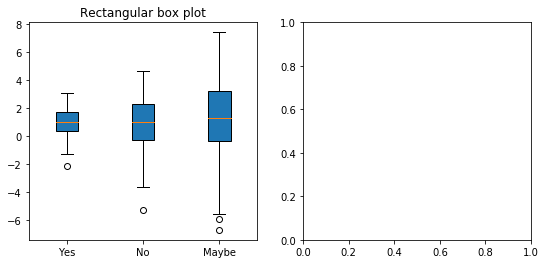

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

bplot1 = axes[0].boxplot(all_data, 
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks


axes[0].set_title('Rectangular box plot')

Populate the second graph

Text(0.5, 1.0, 'Notched box plot')

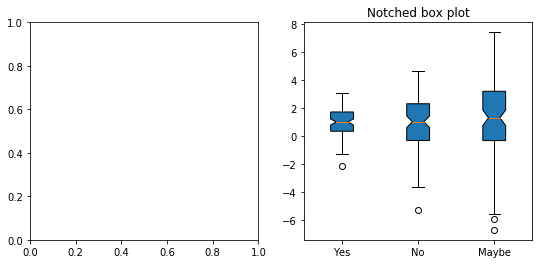

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4)) #Still need to include the plt object to push the onto 

bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         patch_artist=True,
                        labels=labels)  # will be used to label x-ticks

axes[1].set_title('Notched box plot')

Now we can just combine the code

Text(0.5, 1.0, 'Rectangular box plot')

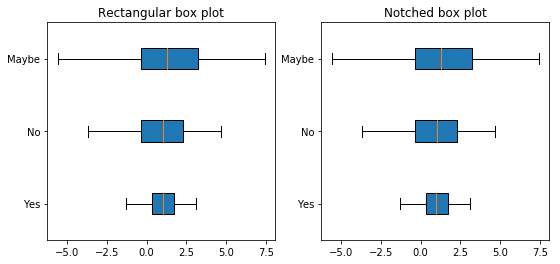

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4)) #Still need to include the plt object to push the onto 

bplot2 = axes[1].boxplot(all_data, # The bracket here references which graph to apply the plot 
                         notch=False,  # notch shape
                         vert=False,
                         patch_artist=True,
                        labels=labels, showfliers=False)

axes[1].set_title('Notched box plot')


bplot1 = axes[0].boxplot(all_data,
                         vert=False,  # vertical box alignment, which is the default
                         notch=False,
                         patch_artist=True,
                        labels=labels, showfliers=False) 
                        

axes[0].set_title('Rectangular box plot')




#Switch the axis for the plots, switch of the notch and turn off the fliers for one graph but not the other

### Scatter Plot

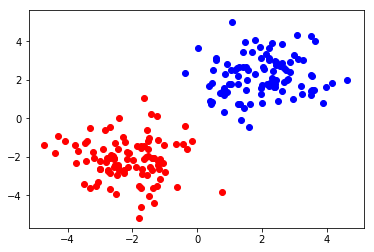

#Scatter --------------------------------------------------


In [51]:
a = np.random.standard_normal((100, 2)) 
a -= np.array((2, 2)) #Centers the data around between -2 , (subtracting -2 to both columns)

b = np.random.standard_normal((100, 2))
b += np.array((2, 2)) # Same centering here except between 2 and 2 


plt.scatter(a[:,0], a[:,1], color = 'red') #Telling the scatter what we want on each axis and the color fill, 
#can change to colors
plt.scatter(b[:,0], b[:,1], color = 'blue')

plt.show()

#Instead of density scaling change the scatters to red and blue. 

print('#Scatter',50*"-")


#### Changing the symbols

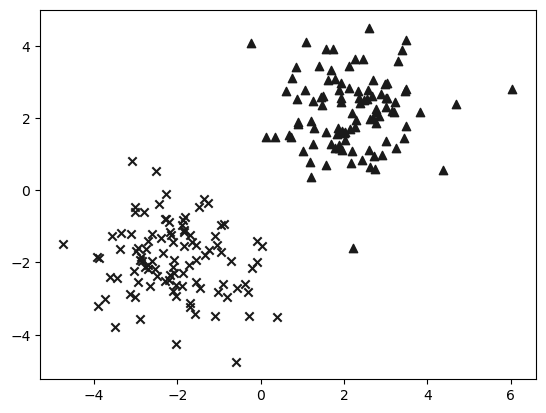

# --------------------------------------------------


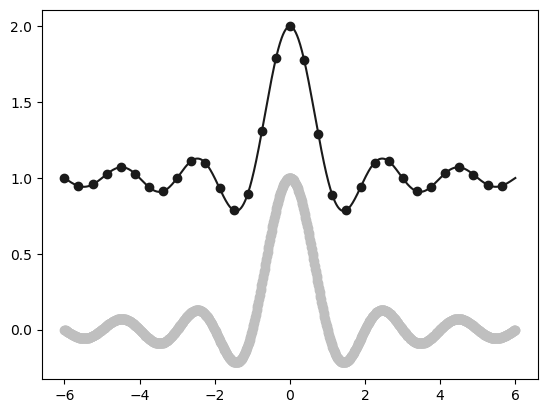

# --------------------------------------------------


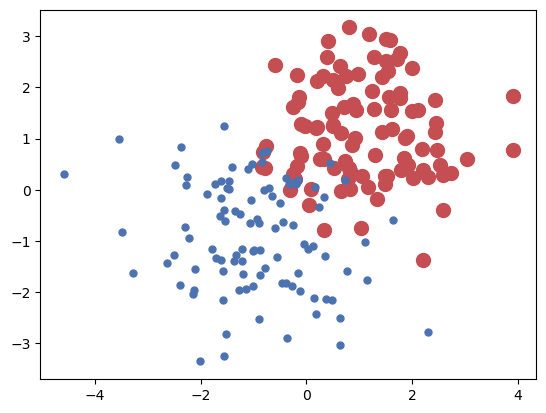

# --------------------------------------------------


In [688]:
a = np.random.standard_normal((100, 2))
a += np.array((-2, -2)) # Center
b = np.random.standard_normal((100, 2))
b += np.array((2, 2)) # Center

plt.scatter(a[:,0], a[:,1], color = 'k', marker = 'x') #change the symbol 
plt.scatter(b[:,0], b[:,1], color = 'k', marker = '^') #change the symbol

plt.show()
print('#',50*"-")

X = np.linspace(-6, 6, 1024) # creating range of data from -6 to 6 in 1,024 steps, can be any number
Y1 = np.sinc(X) #sinc produces a array that has the same shape as the input (sine cardinal)
Y2 = np.sinc(X) + 1 #just moving the line up the graph

plt.plot(X, Y1, marker = 'o', color = '.75') 
plt.plot(X, Y2, marker = 'o', color = 'k', markevery = 32) #markevery spacing of the dots

plt.show()
print('#',50*"-")

a = np.random.standard_normal((100, 2))
a += np.array((-1, -1))
b = np.random.standard_normal((100, 2))
b += np.array((1, 1))

plt.scatter(b[:,0], b[:,1], c = 'r', s = 100) #s is the size of the dots
plt.scatter(a[:,0], a[:,1], c = 'b', s = 25)

plt.show()
print('#',50*"-")

### Bar Charts

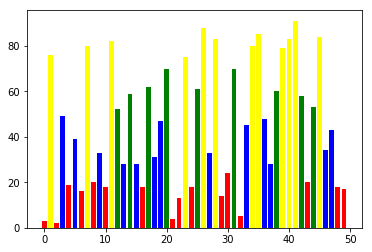

# --------------------------------------------------


In [58]:
values = np.random.randint(99, size = 50) #check out the warning, what does this mean?

color_set = ('red', 'blue', 'green', 'yellow')

color_list = [color_set[(len(color_set) * val) // 100] for val in values] # taking the length of the color set, mulitpling by values in val
# dividing by 100 with no remainder (//) and then indexing on the color_set (maybe walk through in the console), as the
#count gets higher the columns fade.

#A 1 aligns with which value in the color_set


plt.bar(np.arange(len(values)), values, color = color_list) #data aranged from 0 to 50, values are the height and the color is the shading index

plt.show()

print('#',50*"-")

In [60]:
25// 100

0

In [ ]:
#values = np.random.randint(100, size = 50)

#### Tripple stacked bar chart 

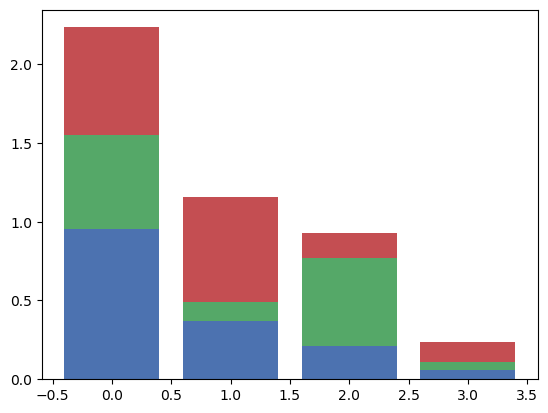

# --------------------------------------------------


In [710]:
a = np.random.rand(4)
b = np.random.rand(4)
c = np.random.rand(4)
x10 = np.arange(4)
plt.bar(x10, a, color = 'b' ) #Show the builds...each piece needs to be added, show by commenting out the code. 
plt.bar(x10, b, color = 'g', bottom = a)
plt.bar(x10, c, color = 'r', bottom = a + b)
plt.show()
print('#',50*"-")

### Adding on graph text

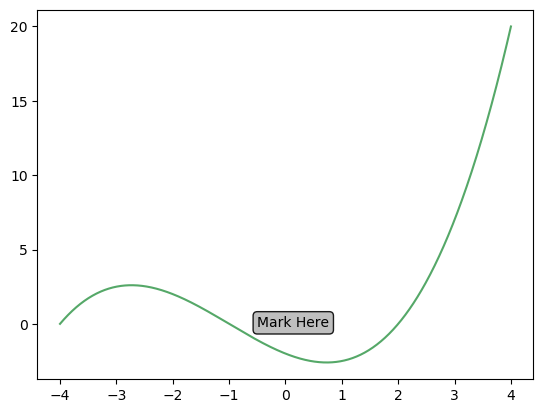

# --------------------------------------------------


In [756]:
x16 = np.linspace(-4, 4, 1000)
y16 = .25 * (x16 + 4) * (x16 + 1) * (x16 - 2)
box = {
'facecolor' : '.75',
'edgecolor' : 'k',
'boxstyle' : 'round'
}

plt.text(-0.5, -0.20, 'Mark Here', bbox = box) #location of the text, text, style 
plt.plot(x16, y16, c = 'g')
plt.show()

#Change the color of the box to red to make a Christmas themed graph...
#maybe plot two lines below and use stats.describe()
print('#',50*"-")

In [694]:
#plt.plot(y16)

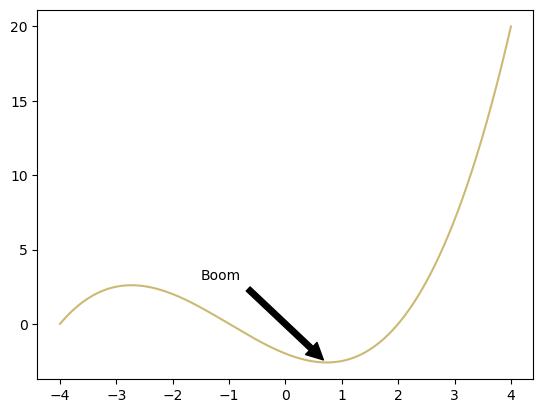

# --------------------------------------------------


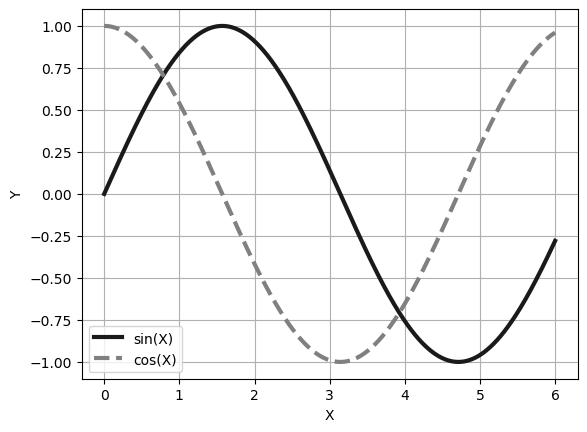

# --------------------------------------------------


In [708]:
x16 = np.linspace(-4, 4, 1000)
y16 = .25 * (x16 + 4.) * (x16 + 1) * (x16 - 2) # essentially adding two curves to the straight line

plt.annotate('Boom',
             xytext = (-1.5, 3.), xy = (0.75, -2.7), #xytext is where to place the text, xy is the point
             arrowprops = { 'facecolor' : 'black', 'shrink' : 0.05 })# draw an arrow between xy and xytext

plt.plot(x16, y16, c = 'y') #c is the RGBA indicator the potential options are here: 
#https://matplotlib.org/3.1.1/api/colors_api.html

plt.show() #Need plot.show here to separate the plots
print('#',50*"-")

x17 = np.linspace(0, 6, 1024)
y17 = np.sin(x17)
y18 = np.cos(x17)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x17, y17, c = 'k', lw = 3., label = 'sin(X)')
plt.plot(x17, y18, c = '.5', lw = 3., ls = '--', label = 'cos(X)')
plt.legend()
plt.grid(True)
plt.show()
print('#',50*"-")

### In Class Activity: Make a Terrible Graph

Ok so we now know the basics of matplot.lib and what to do and not to do on a graph, your challenge is try to make the worst graph possible and send the results to this google slideshow. [Shitty Graphics](https://docs.google.com/presentation/d/1bfDsGKVmPbNIXnJ5kVWe0ycOlnUmv0VX0TgJQxcdSaw/edit?usp=sharing)

Use the politics data we have been working through in the Pandas sections of class. 

# <a name="basics+"></a> More_Options: Seaborn 

### [Help Documentation](https://seaborn.pydata.org/)

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics basically taking boring matplotlib and making it more usefully for developing presentable final graphics. It preassumes some understanding of matplotlib which is why we began review basic syntax of this package first and will now build into Seaborn. 

### Differences between Seaborn and Matplot.lib

Cover the basic syntax as compared to matplotlib 
    
    1. Introduces style themes as a vehicle for automatic formatting (darkgrid, whitegrid, dark, white and ticks)
    2. Pass several plots in a single call, matplotlib usually requires several calls
    3. Lot more features to customize the output
    4. Seems to be better in particular for statistical model output 


#### 1. Example for a previous graph

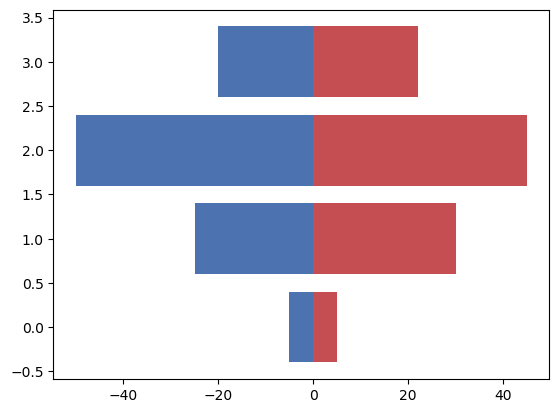

#stacked bar --------------------------------------------------


In [637]:
# Here is our stacked hortizontal bar graph

BMI = np.array([5., 30., 45., 22.])
age = np.array( [5., 25., 50., 20.])
x11 = np.arange(4) # Just creates a single line array (vector)

bar_1 = plt.barh(x11, BMI, color = 'r') #Bar not a histogram so first entry is the y coordinates and the next is the width
bar_1 = plt.barh(x11, -age, color = 'b') #-sign here indicates that the data should be pushed to the other side of the graph
plt.show(bar_1)

print('#stacked bar',50*"-")


#stacked bar --------------------------------------------------


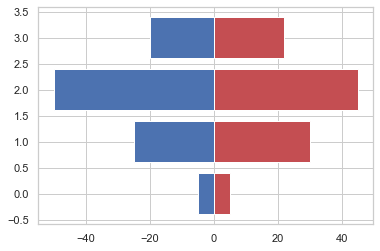

In [612]:
#import seaborn as sns # Now import Seaborn and apply a theme

BMI = np.array([5., 30., 45., 22.])
age = np.array( [5., 25., 50., 20.])
x11 = np.arange(4) # Just creates a single line array (vector)

sns.set(style="whitegrid")

plt.barh(x11, BMI, color = 'r') #Bar not a histogram so first entry is the y coordinates and the next is the width
plt.barh(x11, -age, color = 'b') #-sign here indicates that the data should be pushed to the other side of the graph



print('#stacked bar',50*"-")


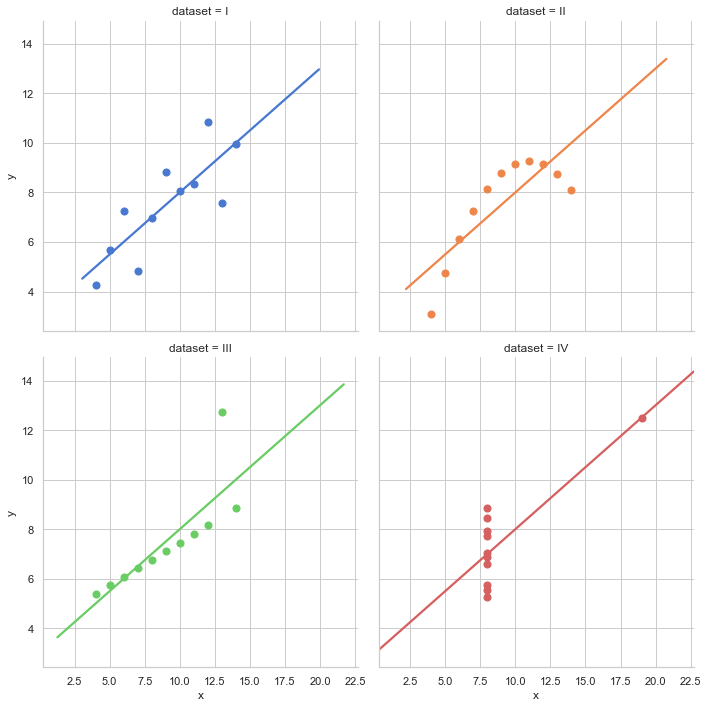

#seaborn_quarters --------------------------------------------------


In [610]:
sns.set(style="whitegrid")

df = sns.load_dataset("anscombe")# Built in dataset in Seaborn...let's take a look
#Let's look at the df


sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df, #
           col_wrap=2, ci=None, palette="muted",
           scatter_kws={"s": 50, "alpha": 1})


plt.show()
print('#seaborn_quarters',50*"-")

### Plotting Larger Datasets 

### Distribution Plotting 

### Kernal Densities 

### Annotative Heat Maps 

### Group Violin Plots

### Modelling 

## Revisit the Standard Plots 

### Pie

### Histogram 

### Scatter Plots

### Barcharts

### Adding Text 

# <a name="#more"></a> Interactive Plots with Plotly 

# <a name="#DASH"></a> DASH to Automate Web App Development 